+# **Project Title: Student Depression Prediction & Analysis**

# **The problem statement**

Many students face stress from studies, social life, and daily habits. This
project predicts if a student might be depressed using their personal,
academic, and lifestyle data. It helps schools find and support students
who may need help

## `Target Variable` :
Depression Indicates if the student is depressed (1 = Yes, 0 = No)
## `Feature` :      
id :  Unique identifier for each student

Gender : Student's gender (e.g., Male, Female)

Age :Age of the student (numeric)

City :City where the student lives

Profession: Usually "Student" (redundant, can be dropped)

Academic Pressure: Level of academic stress (scale 1–5)

Work Pressure:Level of work pressure (scale 1–5 or 0 if not
applicable)


CGPA : Student's academic performance (on a 10-point scale)

Study Satisfaction :Satisfaction with studies (scale 1–5)

Job Satisfaction: Satisfaction with current job (if any)

Sleep Duration: Categorical sleep hours (e.g., '5-6 hours')

Dietary Habits :Quality of diet (e.g., Healthy, Moderate)

Degree :Type of academic program (e.g., BSc, B.Tech)

Have you ever had suicidal
thoughts ?:Yes/No response about suicidal ideation

Work/Study Hours :Number of daily hours spent studying or working

Financial Stress : Financial burden level (scale 1–5)

Family History of Mental
Illness:Yes/No indicating family history

Depression : Target Variable — Indicates if the student is

# Understanding The Data

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/student_depression_dataset.csv")


In [ ]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,Male,33,Visakhapatnam,Student,5,8.97,2,'5-6 hours',Healthy,B.Pharm,Yes,3,1,No,1
1,2,Female,24,Bangalore,Student,2,5.90,5,'5-6 hours',Moderate,BSc,No,3,2,Yes,0
2,3,Male,31,Srinagar,Student,3,7.03,5,'Less than 5 hours',Healthy,BA,No,9,1,Yes,0
3,4,Female,28,Varanasi,Student,3,5.59,2,'7-8 hours',Moderate,BCA,Yes,4,5,Yes,1
4,5,Female,25,Jaipur,Student,4,8.13,3,'5-6 hours',Moderate,M.Tech,Yes,1,1,No,0


In [ ]:
df.shape

(27870, 16)

In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Degree', ' suicidal thoughts ?', 'Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [ ]:
df.dtypes

,0
id,int64
Gender,object
Age,int64
City,object
Profession,object
Academic Pressure,int64
CGPA,float64
Study Satisfaction,int64
Sleep Duration,object
Dietary Habits,object


# Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27870 entries, 0 to 27869
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                27870 non-null  int64  
 1   Gender                            27870 non-null  object 
 2   Age                               27870 non-null  int64  
 3   City                              27870 non-null  object 
 4   Profession                        27870 non-null  object 
 5   Academic Pressure                 27870 non-null  int64  
 6   CGPA                              27870 non-null  float64
 7   Study Satisfaction                27870 non-null  int64  
 8   Sleep Duration                    27870 non-null  object 
 9   Dietary Habits                    27870 non-null  object 
 10  Degree                            27870 non-null  object 
 11   suicidal thoughts ?              27870 non-null  object 
 12  Stud

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
CGPA,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,id,Age,Academic Pressure,CGPA,Study Satisfaction,Study Hours,Depression
count,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000,27870.000000
mean,13935.500000,25.821134,3.140617,7.656028,2.943559,7.157948,0.585145
std,8045.520337,4.906574,1.381640,1.470835,1.361209,3.707180,0.492706
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6968.250000,21.000000,2.000000,6.290000,2.000000,4.000000,0.000000
50%,13935.500000,25.000000,3.000000,7.770000,3.000000,8.000000,1.000000
75%,20902.750000,30.000000,4.000000,8.920000,4.000000,10.000000,1.000000
max,27870.000000,59.000000,5.000000,10.000000,5.000000,12.000000,1.000000


In [ ]:
df["Profession"].value_counts()

,count
Profession,
Student,27870


In [ ]:
df.nunique()

,0
id,27870
Gender,2
Age,34
City,52
Profession,1
Academic Pressure,6
CGPA,332
Study Satisfaction,6
Sleep Duration,5
Dietary Habits,4


In [ ]:
df['Depression'].value_counts()

,count
Depression,
1,16308
0,11562


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,15529
Female,12341


# Data Cleaning

In [ ]:
# Drop irrelevant columns
df.drop(columns=['id', 'Profession', 'City'], inplace=True)

In [ ]:
unique_values = df['Financial Stress'].unique()
missing_count = df['Financial Stress'].isna().sum()

unique_values, missing_count

(array(['1', '2', '5', '3', '4', '?'], dtype=object), np.int64(0))

In [ ]:
# Convert to numeric and fill NaNs with the median
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')
median_value = df['Financial Stress'].median()
# Fill missing values
df['Financial Stress'].fillna(median_value, inplace=True)

<ipython-input-727-e53ab16d5a09>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(median_value, inplace=True)


In [ ]:
df

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,5,8.97,2,'5-6 hours',Healthy,B.Pharm,Yes,3,1.0,No,1
1,Female,24,2,5.90,5,'5-6 hours',Moderate,BSc,No,3,2.0,Yes,0
2,Male,31,3,7.03,5,'Less than 5 hours',Healthy,BA,No,9,1.0,Yes,0
3,Female,28,3,5.59,2,'7-8 hours',Moderate,BCA,Yes,4,5.0,Yes,1
4,Female,25,4,8.13,3,'5-6 hours',Moderate,M.Tech,Yes,1,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,Female,27,5,5.75,5,'5-6 hours',Unhealthy,'Class 12',Yes,7,1.0,Yes,0
27866,Male,27,2,9.40,3,'Less than 5 hours',Healthy,MSc,No,0,3.0,Yes,0
27867,Male,31,3,6.61,4,'5-6 hours',Unhealthy,MD,No,12,2.0,No,0
27868,Female,18,5,6.88,2,'Less than 5 hours',Healthy,'Class 12',Yes,10,5.0,No,1


# Data Visualization

In [ ]:
df['Depression'] = df['Depression'].map({0: 'No', 1: 'Yes'})

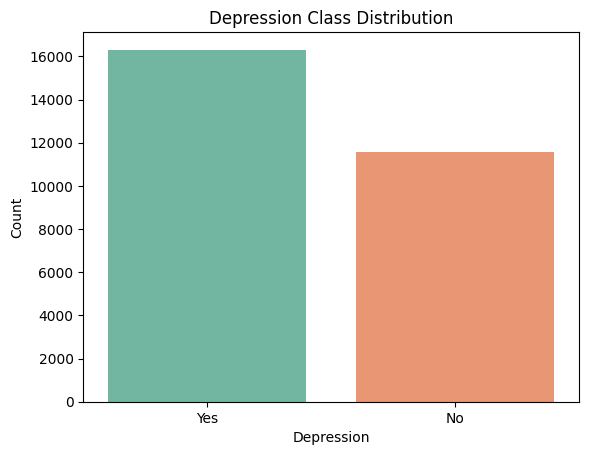

In [ ]:
# count of depression
sns.countplot(data=df, x='Depression', hue='Depression', palette='Set2', legend=False)
plt.title('Depression Class Distribution')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

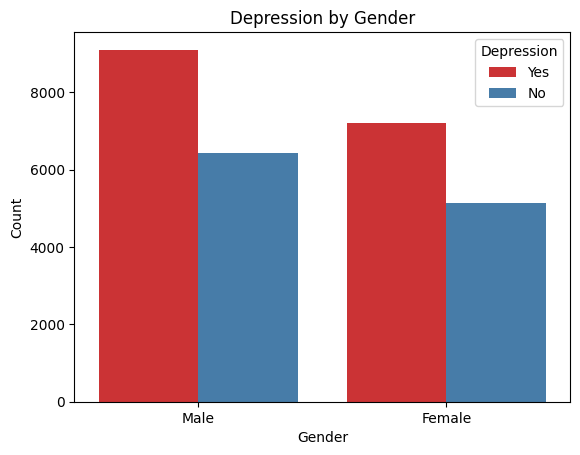

In [ ]:
# count of depression by gender
sns.countplot(data=df, x='Gender', hue='Depression', palette='Set1')
plt.title('Depression by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Academic Pressure', ylabel='count'>

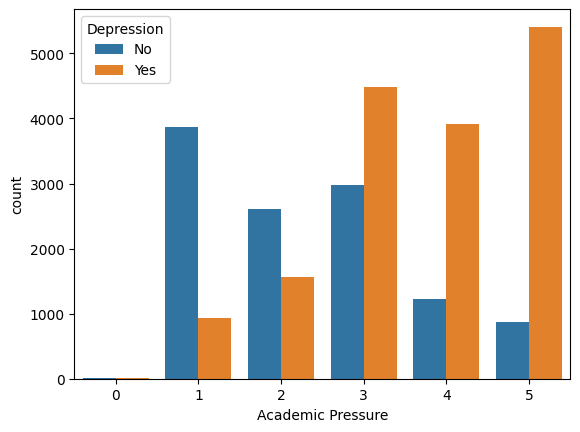

In [ ]:
#visualize the relationship between academic pressure and Depression
sns.countplot(data=df, x='Academic Pressure', hue='Depression')

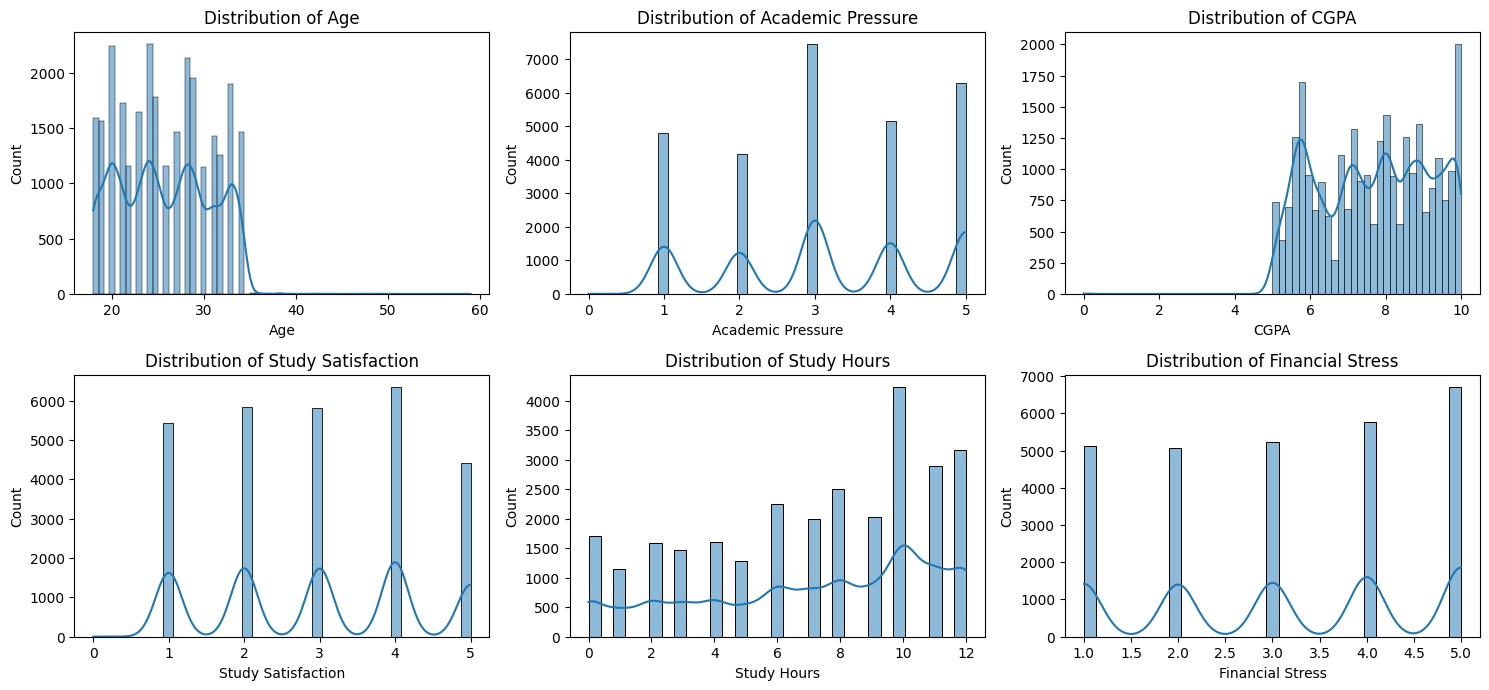

In [ ]:
# Distributions of Numeric Features
numeric_features = [
    'Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
     'Study Hours', 'Financial Stress']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

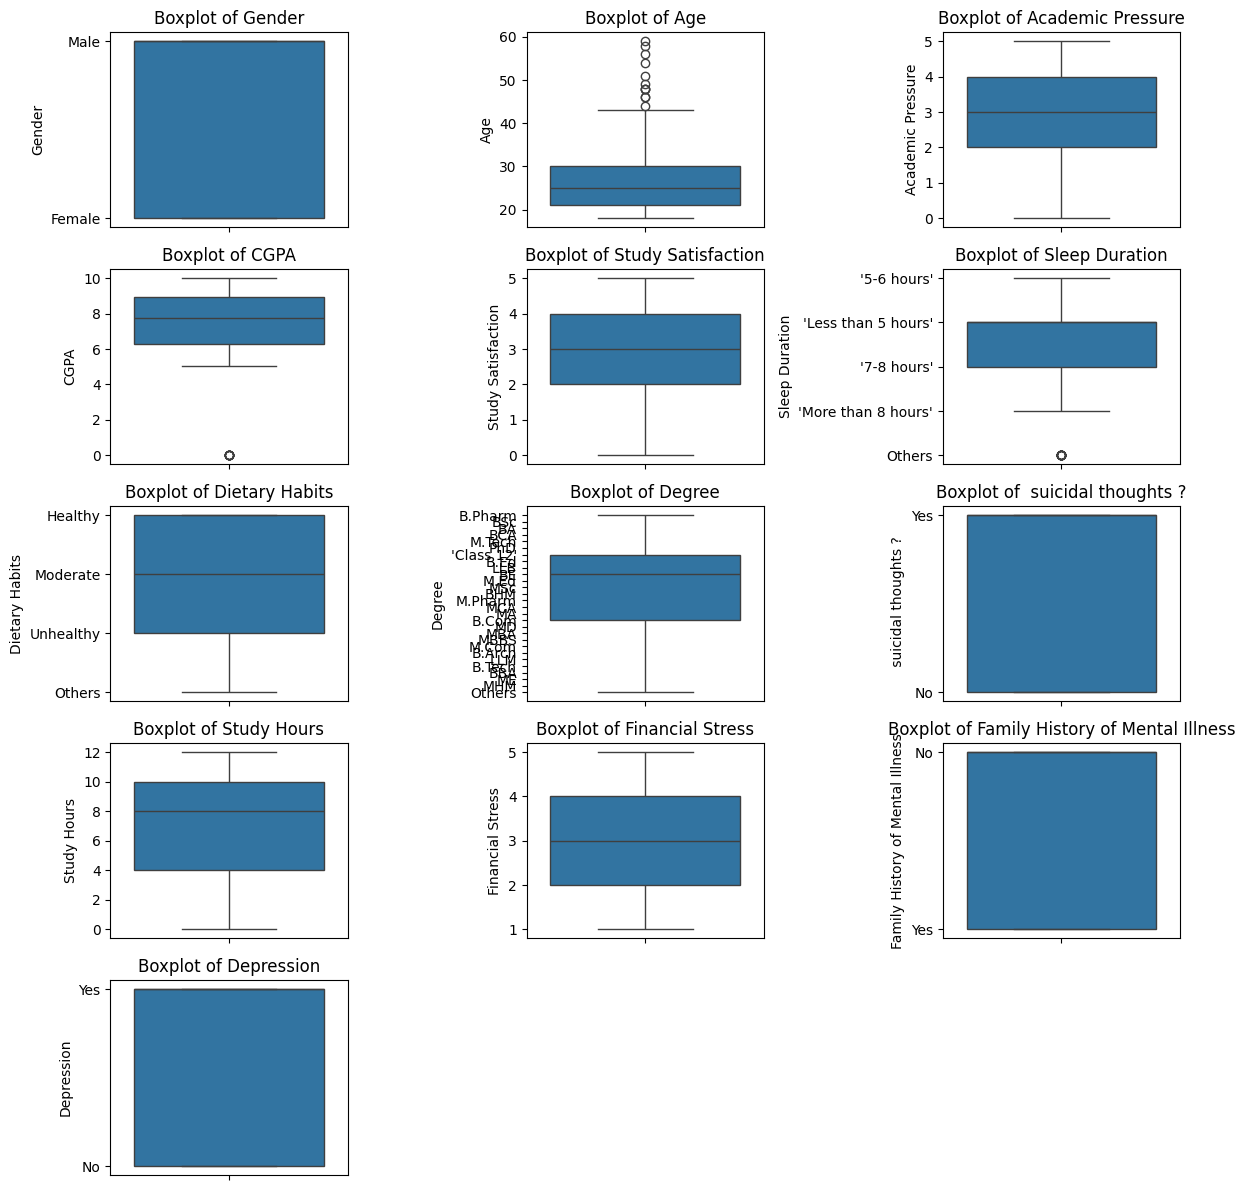

In [ ]:
# Plot boxplots to Identify Outliers
plt.figure(figsize=(12, 12))
for i, col in enumerate(df):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Label Encoding

In [ ]:
unique_values = df['Degree'].unique()
unique_values

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

In [ ]:
degree_group = {
    'B.Pharm': 'Bachelor', 'BSc': 'Bachelor', 'BA': 'Bachelor', 'BCA': 'Bachelor', 'B.Ed': 'Bachelor',
    'BE': 'Bachelor', 'BHM': 'Bachelor', 'B.Com': 'Bachelor', 'B.Arch': 'Bachelor', 'B.Tech': 'Bachelor', 'BBA': 'Bachelor',

    'M.Tech': 'Master', 'M.Ed': 'Master', 'MSc': 'Master', 'M.Pharm': 'Master', 'MCA': 'Master',
    'MA': 'Master', 'MBA': 'Master', 'M.Com': 'Master', 'ME': 'Master', 'MHM': 'Master',

    'PhD': 'Doctorate', 'MD': 'Doctorate', 'MBBS': 'Doctorate',

    'LLB': 'Law', 'LLM': 'Law',

    "'Class 12'": 'High School',
    'Others': 'Other'
}

df['Degree'] = df['Degree'].map(degree_group)


In [ ]:
group_label_mapping = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'Doctorate': 4,
    'Law': 5,
    'Other': 6
}

df['Degree'] = df['Degree'].map(group_label_mapping)

df

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,5,8.97,2,'5-6 hours',Healthy,2,Yes,3,1.0,No,Yes
1,Female,24,2,5.90,5,'5-6 hours',Moderate,2,No,3,2.0,Yes,No
2,Male,31,3,7.03,5,'Less than 5 hours',Healthy,2,No,9,1.0,Yes,No
3,Female,28,3,5.59,2,'7-8 hours',Moderate,2,Yes,4,5.0,Yes,Yes
4,Female,25,4,8.13,3,'5-6 hours',Moderate,3,Yes,1,1.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,Female,27,5,5.75,5,'5-6 hours',Unhealthy,1,Yes,7,1.0,Yes,No
27866,Male,27,2,9.40,3,'Less than 5 hours',Healthy,3,No,0,3.0,Yes,No
27867,Male,31,3,6.61,4,'5-6 hours',Unhealthy,4,No,12,2.0,No,No
27868,Female,18,5,6.88,2,'Less than 5 hours',Healthy,1,Yes,10,5.0,No,Yes


In [ ]:
unique_values = df['Sleep Duration'].unique()
unique_values

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [ ]:
sleep_mapping = {
    "'Less than 5 hours'": 1,
    "'5-6 hours'": 2,
    "'7-8 hours'": 3,
    "'More than 8 hours'": 4,
    'Others': 0  # or use np.nan if you want to treat it as missing
}

df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)


In [ ]:
unique_values = df['Dietary Habits'].unique()
unique_values

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [ ]:
diet_mapping = {
    'Unhealthy': 1,
    'Moderate': 2,
    'Healthy': 3,
    'Others': 0  # Or use np.nan if treating as missing
}

df['Dietary Habits'] = df['Dietary Habits'].map(diet_mapping)

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_cols = []
# le = LabelEncoder()

# for col in label_cols:
#     df[col] = le.fit_transform(df[col])

In [ ]:
binary_columns = [
    ' suicidal thoughts ?',
    'Family History of Mental Illness'
]

# Check and convert values to binary
for col in binary_columns:
    if col in df.columns:
        df[col] = df[col].map({'No': 0, 'Yes': 1})
    else:
        print(f"Column '{col}' not found in the dataset")

In [ ]:
# If Gender is 'Male' / 'Female' and Depression is 'Yes'/'No'
Gender= pd.get_dummies(df['Gender'], drop_first=True).astype(bool)
df = pd.concat([df, Gender], axis=1)

df['Depression'] = df['Depression'].map({'No': 0, 'Yes': 1})
df.drop(columns=['Gender'], inplace=True)


In [ ]:
# df[' suicidal thoughts ?'] = df[' suicidal thoughts ?'].map({'Yes': 1, 'No': 0})

# Outlier Detection & Removal

---



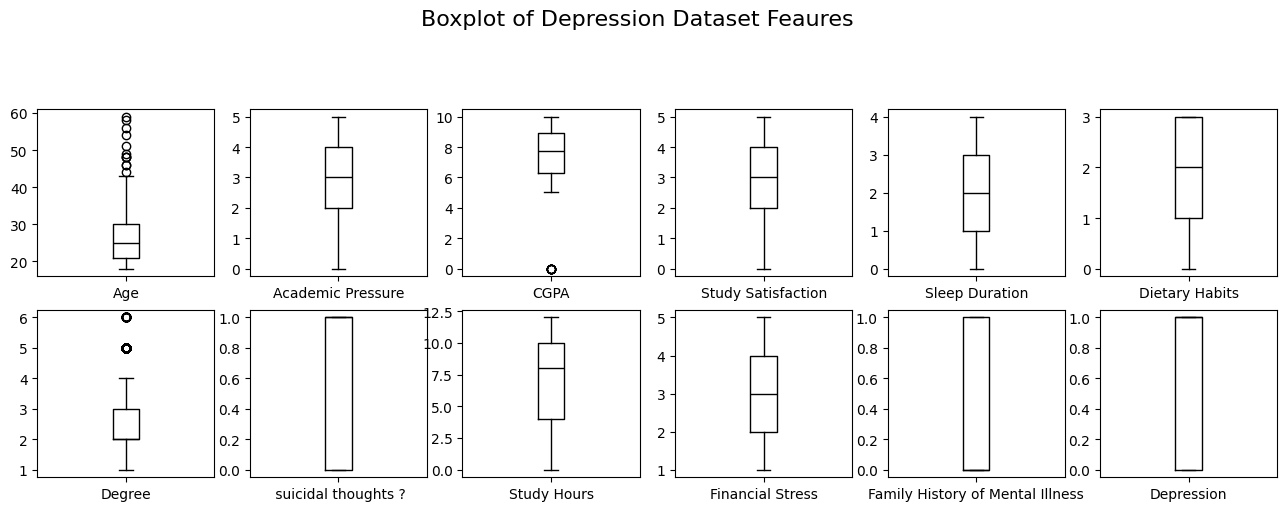

In [ ]:
# identify outliers in the numeric columns
df.plot(kind='box',subplots=True,layout=(4,6),figsize=(16,10),color='black')
plt.suptitle('Boxplot of Depression Dataset Feaures',fontsize=16)
plt.show()

In [ ]:
# Filter numeric columns correctly
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
# Detect and print outliers
for col in numeric_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")


Age: 12 outliers
Academic Pressure: 0 outliers
CGPA: 9 outliers
Study Satisfaction: 0 outliers
Sleep Duration: 0 outliers
Dietary Habits: 0 outliers
Degree: 1187 outliers
 suicidal thoughts ?: 0 outliers
Study Hours: 0 outliers
Financial Stress: 0 outliers
Family History of Mental Illness: 0 outliers
Depression: 0 outliers


In [ ]:
# Function to remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)# First quartile (25% )
    Q3 = df[column].quantile(0.75)  # Third quartile (75% )
    IQR = Q3 - Q1                   # Interquartile range (spread of middle 50% of data)

    lower_bound = Q1 - 1.5 * IQR # Lower limit for outliers
    upper_bound = Q3 + 1.5 * IQR # Upper limit for outliers
    # Keep only rows within the bounds (remove outliers)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to multiple columns
for col in ['Age','CGPA','Sleep Duration']:
    df = remove_outliers_iqr(df, col)

In [ ]:
df

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male
0,33,5,8.97,2,2,3,2,1,3,1.0,0,1,True
1,24,2,5.90,5,2,2,2,0,3,2.0,1,0,False
2,31,3,7.03,5,1,3,2,0,9,1.0,1,0,True
3,28,3,5.59,2,3,2,2,1,4,5.0,1,1,False
4,25,4,8.13,3,2,2,3,1,1,1.0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,27,5,5.75,5,2,1,1,1,7,1.0,1,0,False
27866,27,2,9.40,3,1,3,3,0,0,3.0,1,0,True
27867,31,3,6.61,4,2,1,4,0,12,2.0,0,0,True
27868,18,5,6.88,2,1,3,1,1,10,5.0,0,1,False


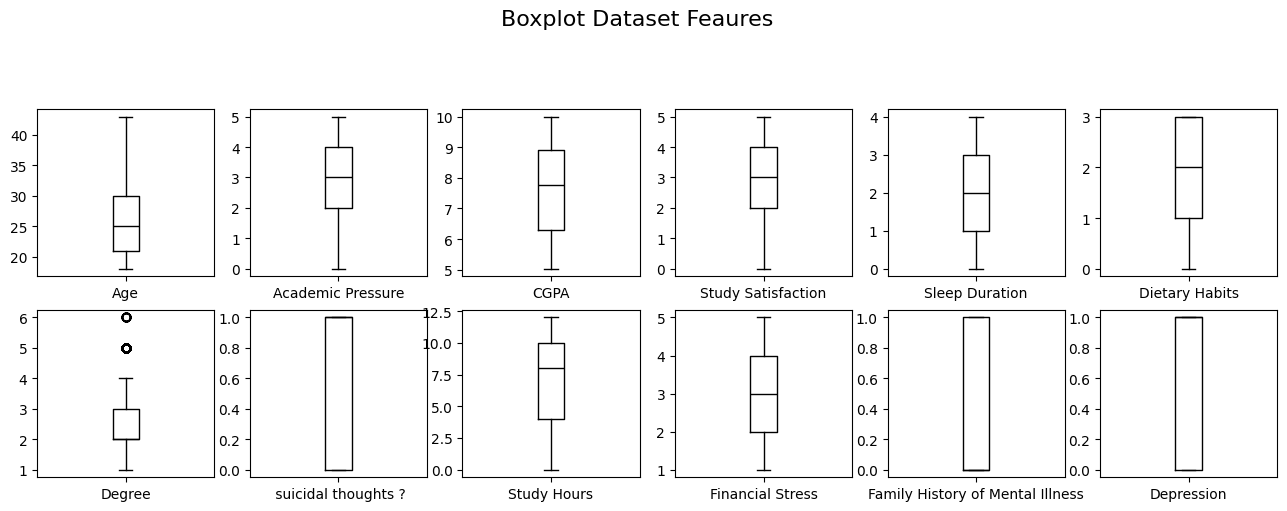

In [ ]:
# Plot again to confirm removal
df.plot(kind='box',subplots=True,layout=(4,6),figsize=(16,10),color='black')
plt.suptitle('Boxplot Dataset Feaures',fontsize=16)
plt.show()

In [ ]:
df.skew()

,0
Age,0.078164
Academic Pressure,-0.134070
CGPA,-0.073652
Study Satisfaction,0.011897
Sleep Duration,0.079443
Dietary Habits,0.169670
Degree,0.793659
suicidal thoughts ?,-0.550563
Study Hours,-0.455953
Financial Stress,-0.129555


In [ ]:
df

,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,Male
0,33,5,8.97,2,2,3,2,1,3,1.0,0,1,True
1,24,2,5.90,5,2,2,2,0,3,2.0,1,0,False
2,31,3,7.03,5,1,3,2,0,9,1.0,1,0,True
3,28,3,5.59,2,3,2,2,1,4,5.0,1,1,False
4,25,4,8.13,3,2,2,3,1,1,1.0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27865,27,5,5.75,5,2,1,1,1,7,1.0,1,0,False
27866,27,2,9.40,3,1,3,3,0,0,3.0,1,0,True
27867,31,3,6.61,4,2,1,4,0,12,2.0,0,0,True
27868,18,5,6.88,2,1,3,1,1,10,5.0,0,1,False


# Correlation Analysis

In [ ]:
df.dtypes

,0
Age,int64
Academic Pressure,int64
CGPA,float64
Study Satisfaction,int64
Sleep Duration,int64
Dietary Habits,int64
Degree,int64
suicidal thoughts ?,int64
Study Hours,int64
Financial Stress,float64


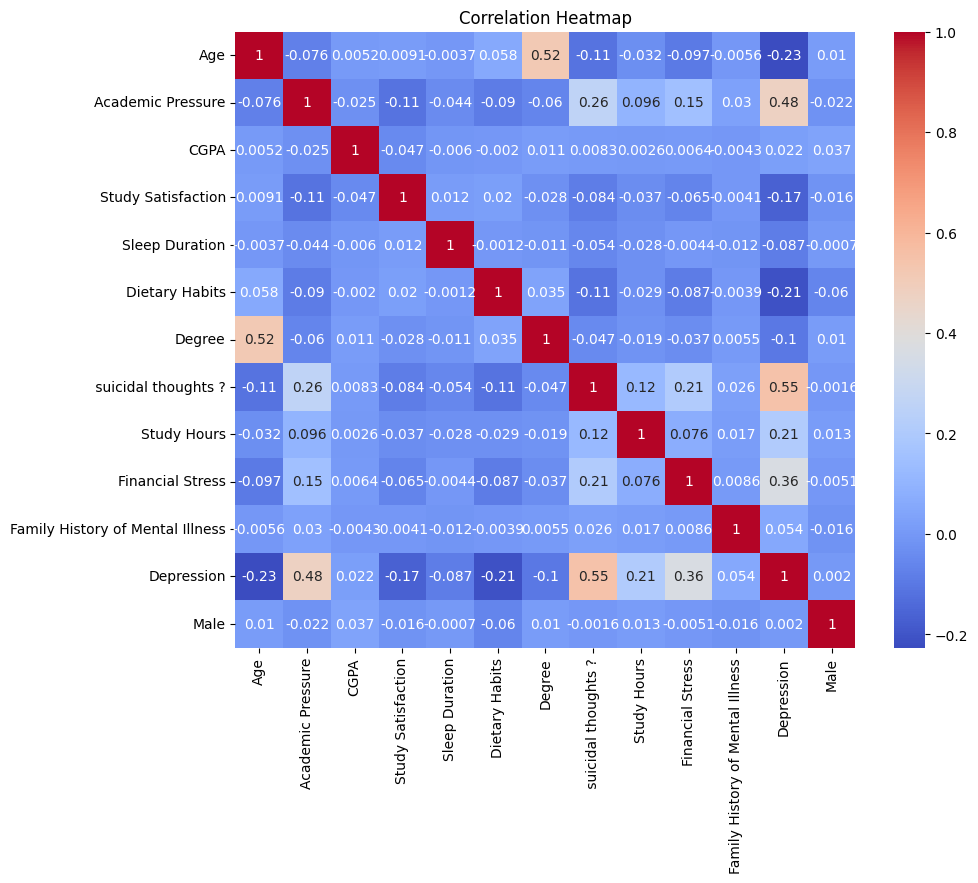

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Correlation with Depression
correlation_with_target = df.corr()['Depression'].sort_values(ascending=False)
print(correlation_with_target)

Depression                          1.000000
 suicidal thoughts ?                0.546682
Academic Pressure                   0.475011
Financial Stress                    0.363906
Study Hours                         0.208848
Family History of Mental Illness    0.053605
CGPA                                0.021908
Male                                0.001999
Sleep Duration                     -0.086908
Degree                             -0.100469
Study Satisfaction                 -0.168234
Dietary Habits                     -0.207071
Age                                -0.226020
Name: Depression, dtype: float64


# Train-Test Split & SMOTE Balancing

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Features (X) and Target (y)
X = df.drop('Depression', axis=1)
y = df['Depression']


# Split before SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Training data:", X_train_bal.shape)
print("Test data:", X_test.shape)
print("Training labels:", y_train_bal.shape)
print("Test labels:", y_test.shape)



Training data: (26002, 12)
Test data: (5570, 12)
Training labels: (26002,)
Test labels: (5570,)


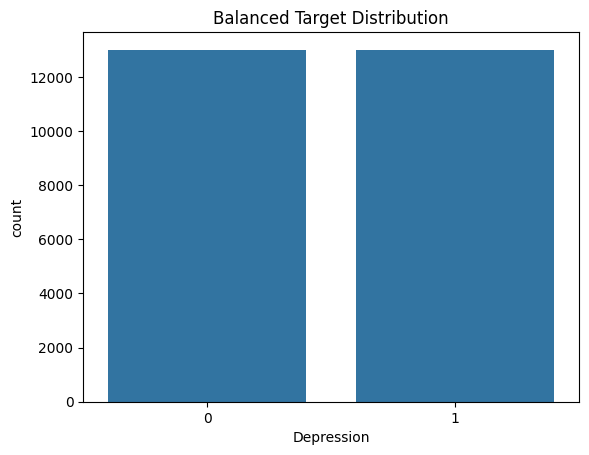

In [ ]:
sns.countplot(x=y_train_bal)
plt.title("Balanced Target Distribution")
plt.show()

#  Model Training & Evaluation

In [ ]:
# # Scale the features
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_bal)
# X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Dictionary to store results
results = []

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    })

# Convert to DataFrame for display
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Gradient Boosting,0.845601,0.865091,0.876098,0.87056
1,Logistic Regression,0.844704,0.869539,0.868222,0.86888
2,Random Forest,0.838959,0.859880,0.870039,0.86493


# Confusion Matrix

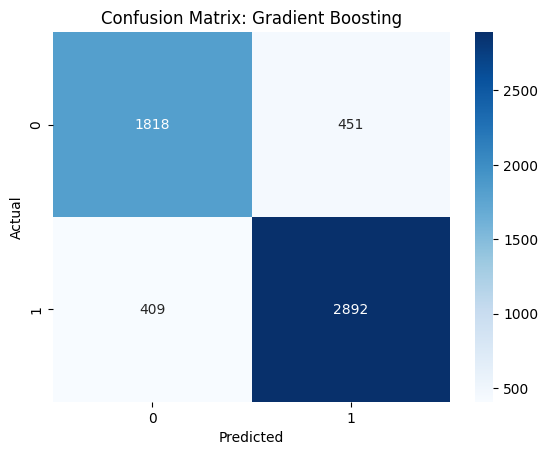

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix: {name}")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()